<a href="https://colab.research.google.com/github/momomendoza2476-max/SIMULACI-N-II/blob/main/27_nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Llegadas a Servidor 1: [0.5661815139815478, 2.8946504562288107, 3.1453476543727694, 4.8770012514886005, 6.435226183440458, 7.608047826977495, 12.308011488198234, 12.969114266042494, 13.593403666007125, 13.692329521481332, 15.168218881517323, 15.17032405108625, 15.232369929273522, 15.293254658686738, 15.997676833841517, 16.58660323884348, 16.94849343628146, 18.867591461594632, 19.023595262754025, 19.32877510036293, 19.73143428919003, 20.97226882131437, 21.124900811028173, 21.71626289304033, 23.734434294814573, 24.33475614801325, 25.968529604863967, 26.313102312749784, 27.229651766790347, 27.77013331275111, 28.340541690538235, 29.678278809483256, 30.037708448091756, 30.207736013352992, 30.529328351539316, 33.2272209560351, 35.40107426357802, 36.1689076408404, 37.180253333822044, 37.491328729088, 38.05691266249477, 38.863910107676745, 39.908773894957434, 41.016612446247784, 41.34381868818364]
Llegadas a Servidor 2: [0.7794701064256415, 3.255025220579259, 4.410834669772166, 7.3923691425967

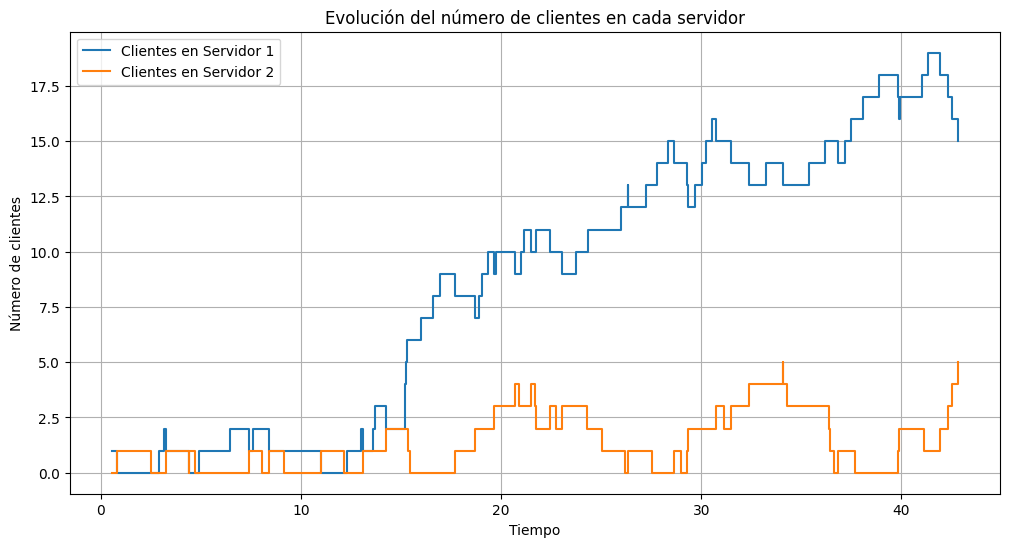

In [1]:
import math
import random
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Función para generar tiempos (puedes cambiar lambda)
# ----------------------------------------------------
def generar_T(lam=1.0):
    return random.expovariate(lam)

# ----------------------------------------------------
# Variables iniciales
# ----------------------------------------------------
t = 0
n1 = 0
n2 = 0
NLL = 0
NS = 0

LL1 = []     # Llegadas servidor 1
LL2 = []     # Llegadas servidor 2
SAL = []     # Salidas del sistema

# Para gráfica
tiempos = []
cola_1 = []
cola_2 = []

# Generar T_0
T_0 = generar_T()
t_LL = T_0
t_1 = math.inf
t_2 = math.inf

# ----------------------------------------------------
# Condición de paro
# ----------------------------------------------------
MAX_EVENTOS = 100
eventos = 0

# ----------------------------------------------------
# Simulación
# ----------------------------------------------------
while eventos < MAX_EVENTOS:

    # ----------------------------- CASO 1 -----------------------------
    if (t_LL <= t_1) and (t_LL <= t_2):
        t = t_LL
        NLL += 1
        n1 += 1

        LL1.append(t)

        # generar siguiente llegada
        t_LL = t + generar_T()

        if n1 == 1:
            t_1 = t + generar_T()

        # Guardar para gráfica
        tiempos.append(t)
        cola_1.append(n1)
        cola_2.append(n2)

        eventos += 1
        continue

    # ----------------------------- CASO 2 -----------------------------
    if (t_LL > t_1) and (t_1 <= t_2):
        t = t_1
        n1 -= 1
        n2 += 1

        LL2.append(t)

        if n1 == 0:
            t_1 = math.inf
        else:
            t_1 = t + generar_T()

        if n2 == 1:
            t_2 = t + generar_T()

        tiempos.append(t)
        cola_1.append(n1)
        cola_2.append(n2)

        eventos += 1
        continue

    # ----------------------------- CASO 3 -----------------------------
    if (t_2 < t_1) and (t_2 < t_LL):
        t = t_2
        NS += 1
        n2 -= 1

        SAL.append(t)

        if n2 > 0:
            t_2 = t + generar_T()
        else:
            t_2 = math.inf

        tiempos.append(t)
        cola_1.append(n1)
        cola_2.append(n2)

        eventos += 1
        continue

# ----------------------------------------------------
# RESULTADOS NUMÉRICOS
# ----------------------------------------------------
print("Llegadas a Servidor 1:", LL1)
print("Llegadas a Servidor 2:", LL2)
print("Salidas:", SAL)
print("\nTotal de llegadas:", NLL)
print("Total de salidas:", NS)

# ----------------------------------------------------
# GRÁFICA DEL PROCESO DE COLA
# ----------------------------------------------------
plt.figure(figsize=(12,6))
plt.step(tiempos, cola_1, where='post', label="Clientes en Servidor 1")
plt.step(tiempos, cola_2, where='post', label="Clientes en Servidor 2")

plt.title("Evolución del número de clientes en cada servidor")
plt.xlabel("Tiempo")
plt.ylabel("Número de clientes")
plt.legend()
plt.grid(True)
plt.show()


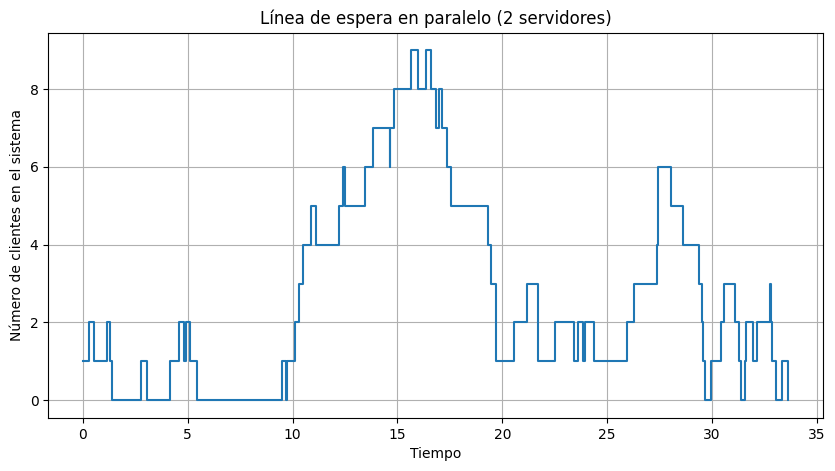

In [2]:
import random
import math
import matplotlib.pyplot as plt

def generar_T(lam=1.0):
    return random.expovariate(lam)

# --- Parámetros ---
m = 2          # servidores paralelos
t = 0
n = 0          # número de clientes en el sistema

# tiempos en que se liberan los servidores
t_serv = [math.inf] * m

t_LL = generar_T()  # primer arribo

tiempos = []
clientes = []

MAX_EVENTOS = 80
eventos = 0

while eventos < MAX_EVENTOS:

    t_next = min([t_LL] + t_serv)
    t = t_next

    # --- Llegada ---
    if t == t_LL:
        n += 1

        # buscar servidor libre
        if math.inf in t_serv:
            idx = t_serv.index(math.inf)
            t_serv[idx] = t + generar_T()   # empieza servicio inmediato

        t_LL = t + generar_T()

    # --- Salida ---
    else:
        idx = t_serv.index(t)
        n -= 1

        if n >= m:   # cola no vacía
            t_serv[idx] = t + generar_T()
        else:
            t_serv[idx] = math.inf

    tiempos.append(t)
    clientes.append(n)

    eventos += 1

# --- Gráfica ---
plt.figure(figsize=(10,5))
plt.step(tiempos, clientes, where='post')
plt.title("Línea de espera en paralelo (2 servidores)")
plt.xlabel("Tiempo")
plt.ylabel("Número de clientes en el sistema")
plt.grid(True)
plt.show()
